In [16]:
! pip install -q kaggle

In [17]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
! unzip "/content/creditcardfraud.zip" -d "/content/creditcardfraud"

Archive:  /content/creditcardfraud.zip
replace /content/creditcardfraud/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: غ
error:  invalid response [غ]
replace /content/creditcardfraud/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/creditcardfraud/creditcard.csv  


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Data

In [22]:
import pandas as pd
import io

df = pd.read_csv('/content/creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [23]:
df.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [26]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
df = df.drop("Time" , axis = 1)

In [28]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [30]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

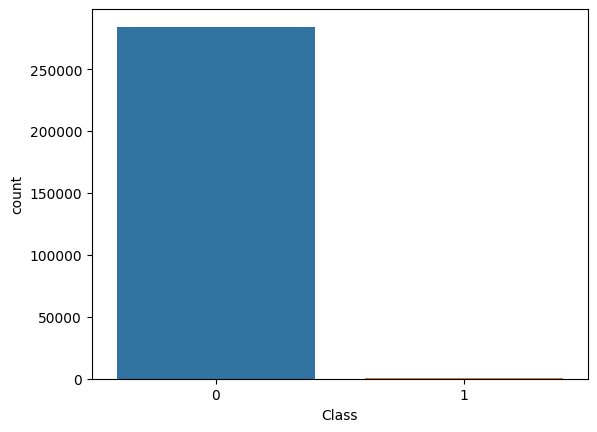

In [31]:
import seaborn as sns
sns.countplot(x="Class", data=df)

This Dataset is highly unblanced
0 --> Normal Transaction

1 --> fraudulent transaction

In [32]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [36]:
print(legit.shape)
print(fraud.shape)


(284315, 30)
(492, 30)


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [37]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,std_Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [38]:
legit_sample = legit.sample(n=492)

In [41]:
df_new = pd.concat([legit_sample, fraud], axis=0)

In [42]:
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
53079,-0.730018,1.235694,-0.501732,-0.420932,2.561720,3.491456,0.237271,0.758113,-0.339452,0.572811,...,0.048289,0.221221,-0.224851,1.002518,-0.105786,-0.395611,-0.443084,-0.297178,0,-0.339916
121066,-1.131758,0.408144,1.955134,1.583293,-0.316136,1.268910,-0.447058,0.963579,0.042137,-0.729555,...,-0.203278,-0.433912,-0.007146,-0.290157,-0.059620,-0.387783,0.066936,-0.000244,0,-0.171316
51703,1.091151,-0.534829,1.201769,0.212347,-1.310370,-0.176258,-0.737365,0.204635,0.993949,-0.285804,...,-0.154149,-0.315519,0.069815,0.612190,0.052465,0.910065,-0.046261,0.011026,0,-0.189308
263026,2.021170,0.171540,-1.586714,0.337452,0.451806,-0.645532,0.137839,-0.145113,0.104649,-0.231859,...,-0.292256,-0.733985,0.342021,0.690896,-0.286771,0.140081,-0.061057,-0.037223,0,-0.349671
224475,1.950913,0.052323,-1.679003,0.468294,0.112924,-1.251032,0.193025,-0.246525,0.365157,-0.308294,...,0.267885,0.832073,-0.043758,0.007375,0.190222,-0.128867,-0.013478,-0.035855,0,-0.222092


In [44]:
df_new.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,-0.183191


In [45]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,0.514355


In [46]:
df_new['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [47]:
df_new.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,std_Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.123387,-0.020560,0.075110,-0.032643,-0.017138,0.042275,0.024497,0.018687,-0.025508,-0.070970,...,0.000807,0.054265,-0.000703,0.000510,0.028543,-0.016861,0.009824,0.009391,-0.002238,0.043599
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


# Split Data

In [50]:
X = df_new.drop(columns='Class', axis=1)
Y = df_new['Class']

In [51]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,std_Amount
53079,-0.730018,1.235694,-0.501732,-0.420932,2.561720,3.491456,0.237271,0.758113,-0.339452,0.572811,...,0.241795,0.048289,0.221221,-0.224851,1.002518,-0.105786,-0.395611,-0.443084,-0.297178,-0.339916
121066,-1.131758,0.408144,1.955134,1.583293,-0.316136,1.268910,-0.447058,0.963579,0.042137,-0.729555,...,0.082534,-0.203278,-0.433912,-0.007146,-0.290157,-0.059620,-0.387783,0.066936,-0.000244,-0.171316
51703,1.091151,-0.534829,1.201769,0.212347,-1.310370,-0.176258,-0.737365,0.204635,0.993949,-0.285804,...,-0.034876,-0.154149,-0.315519,0.069815,0.612190,0.052465,0.910065,-0.046261,0.011026,-0.189308
263026,2.021170,0.171540,-1.586714,0.337452,0.451806,-0.645532,0.137839,-0.145113,0.104649,-0.231859,...,-0.103247,-0.292256,-0.733985,0.342021,0.690896,-0.286771,0.140081,-0.061057,-0.037223,-0.349671
224475,1.950913,0.052323,-1.679003,0.468294,0.112924,-1.251032,0.193025,-0.246525,0.365157,-0.308294,...,-0.157115,0.267885,0.832073,-0.043758,0.007375,0.190222,-0.128867,-0.013478,-0.035855,-0.222092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


# Model

In [54]:
model = LogisticRegression()

In [55]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Accuracy

In [56]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [60]:
print('Accuracy on Training data : ', training_data_accuracy * 100)

Accuracy on Training data :  95.04447268106735


In [61]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [63]:
print('Accuracy score on Test Data : ', test_data_accuracy * 100)

Accuracy score on Test Data :  93.4010152284264
